In [ ]:
#Name: Uday

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Load the dataset
main_df = pd.read_csv(r'C:\Users\Public\israel_prices.csv')
main_df.columns = main_df.columns.str.replace('-|\(|\)| ', '_', regex=True)
print(main_df.columns)

Index(['Year', 'Month', '91_octane_gasoline__1_liter_',
       '95_octane_gasoline_in_full_fuel__1_liter_',
       '96_octane_gasoline__1_liter_', '98_plus_octane_gasoline__1_liter_',
       'Apples___Golden_Delicious__1_kg_', 'Apples___Granny_Smith__1_kg_',
       'Apples___Jonathan__1_kg_', 'Apricot__1_kg_',
       ...
       'lemons__1_kg_', 'mango__1_kg_', 'olives_by_weight__100_g_',
       'persimmon__1_kg_', 'raw_tehini__500_grams_', 'red_radish__1_kg_',
       'tea_bags__1_gram___100_bags_', 'unsalted_butter__100_g_',
       'watermelon__1_kg_', 'whole_rice__packaged___1_kg_'],
      dtype='object', length=144)


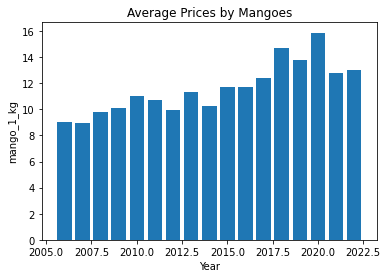

In [48]:
# Bar plot of the average prices by Year
avg_prices = main_df.groupby('Year')['mango__1_kg_'].mean().reset_index()
plt.bar(avg_prices['Year'], avg_prices['mango__1_kg_'])
plt.title('Average Prices by Mangoes')
plt.xlabel('Year')
plt.ylabel('mango_1_kg')
plt.show()


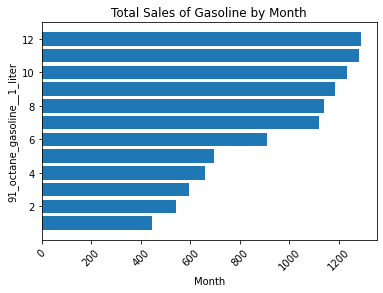

In [55]:
# Bar chart of the total sales by month
total_sales = main_df.groupby('Month')['91_octane_gasoline__1_liter_'].sum().reset_index()
plt.barh(total_sales['Month'], total_sales['91_octane_gasoline__1_liter_'])
plt.title('Total Sales of Gasoline by Month')
plt.xlabel('Month')
plt.ylabel('91_octane_gasoline__1_liter')
plt.xticks(rotation=45)
plt.show()


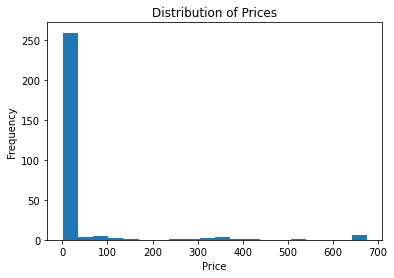

In [59]:
# Histogram of the distribution of prices
plt.hist(main_df['whole_rice__packaged___1_kg_'], bins=20)
plt.title('Distribution of Whole Rice Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

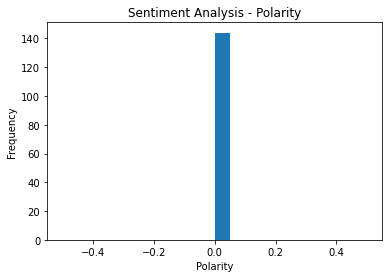

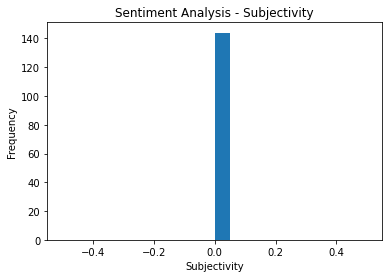

In [79]:
# Sentiment analysis of the types
from textblob import TextBlob

cln_typ = main_df.columns.values.tolist()
polarity = []
subjectivity = []
for i in cln_typ:
    blob = TextBlob(i)
    polarity.append(blob.sentiment.polarity)
    subjectivity.append(blob.sentiment.subjectivity)
    
plt.hist(polarity, bins=20)
plt.title('Sentiment Analysis - Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

plt.hist(subjectivity, bins=20)
plt.title('Sentiment Analysis - Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

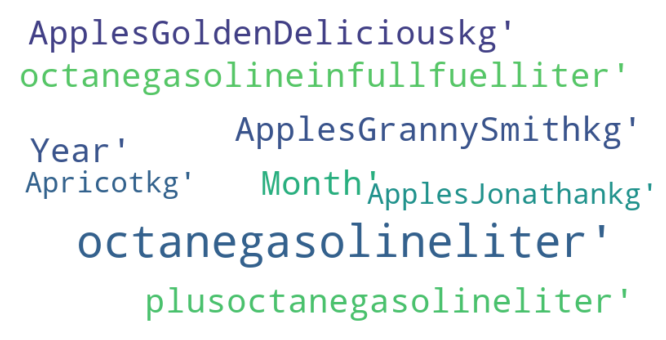

In [128]:
# Word cloud of column descriptions
main_df_columns =main_df.columns.str.replace(r'\d+', '')
text = [c.replace('_', '') for c in main_df_columns][0:10]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(str(text))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [83]:
# TF-IDF analysis of product descriptions
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform( main_df.columns.values.tolist())
feature_names = vectorizer.get_feature_names()
top_words = np.argsort(tfidf.toarray().sum(axis=0))[::-1][:10]
print('Top 10 words by TF-IDF score:')
for i in top_words:
    print(feature_names[i], tfidf.toarray().sum(axis=0)[i])

Top 10 words by TF-IDF score:
red_radish__1_kg_ 2.0
000_liters_ 1.3567050543142503
__1_kg_ 1.3567050543142503
pasta 1.3567050543142503
5_liters_ 1.3567050543142503
dry_onion__1_kg_ 1.0
dry_or_semi_dry_red_wine__750_ml_ 1.0
eggplant_salad__250_grams_ 1.0
dry_beans_in_a_package__500_grams_ 1.0
eggplant_salad__500_grams_ 1.0


In [84]:
# Topic modeling of product descriptions
lda = LatentDirichletAllocation(n_components=5)
lda.fit(tfidf)
for i, topic in enumerate(lda.components_):
    print(f'Topic {i}:')
    print([feature_names[j] for j in topic.argsort()[-10:]])

Topic 0:
['dry_beans_in_a_package__500_grams_', 'sausages__non_vegetarian___500_grams_', 'plums___sagiv__1_kg_', 'instant_coffee__200_grams_', 'dry_onion__1_kg_', 'green_grapes_without_pits__1_kg_', 'packaged_hummus_salad__1_kg_', '98_plus_octane_gasoline__1_liter_', 'light_green_pepper__1_kg_', 'red_radish__1_kg_']
Topic 1:
['engine_oil_for_the_car__1_liter_', 'regular_tomatoes__1_kg_', 'corn_on_the_cob__1_kg_', 'plain_packed_rice__1_kg_', 'white_flour__1_kg_', '91_octane_gasoline__1_liter_', 'cucumbers__1_kg_', '95_octane_gasoline_in_full_fuel__1_liter_', 'melons___galia__1_kg_', 'canned_garden_peas__about_550_grams_']
Topic 2:
['dry_or_semi_dry_red_wine__750_ml_', 'lentils__500_grams_', 'milk_substitutes_for_babies__400_grams_', 'diesel_fuel_for_a_private_car__1_liter_', 'canned_corn_kernels__335_grams_', 'pears___spadona__1_kg_', 'hummus_salad__250_grams_', 'frozen_beef___ribs__1_kg_', 'eggplant_salad__500_grams_', 'apples___granny_smith__1_kg_']
Topic 3:
['tuna_fish_in_a_box__170_

In [126]:
# Named entity recognition of columns descriptions
def named_entity(text):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    entities = []
    for chunk in chunked:
        if hasattr(chunk, 'label') and chunk.label() == 'NE':
            entities.append(' '.join(c[0] for c in chunk))
    return entities

entities = []
for text in main_df.columns.values.tolist():
    entities += named_entity(text)
entity_counts = Counter(entities)
for entity, count in entity_counts.most_common(1):
    print(entity, count)


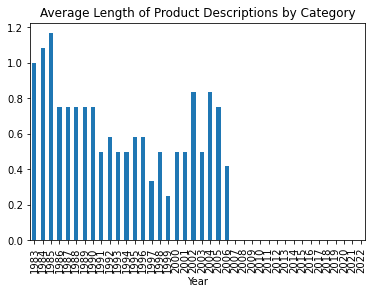

In [110]:
# Length of text analysis of Apricot
main_df['length'] = main_df['Apricot__1_kg_'].fillna('').apply(lambda x: len(str(x)))
main_df.groupby('Year')['length'].mean().plot(kind='bar', title='Average Length of Product Descriptions by Category')
plt.show()